# Gradient Descent Implemented on multiple features

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import pchip
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
class my_gradient:
    def __init__(self, X,Y, lrate, initial_b, weights, niteration):
        self.X = X
        self.Y = Y
        self.lrate = lrate
        self.initial_b = initial_b
        self.weights = weights
        self.niteration = niteration

    
    def predict(updatead_weights, x):
        return (updatead_weights[0] + sum((x * updatead_weights[1:])))


    def compute_error(updatead_weights, X, Y):
        totalError=0
        for i in range(0,len(X)):
            totalError +=(Y[i] - (updatead_weights * X[i] + updatead_weights[0]))**2
        return sum(totalError/float(len(X)))
        
    def gradientStep(weights, X, Y, lrate):
        dm = np.zeros(len(weights))
        N=float(len(X))
        copy_weights = weights
        updatead_weights = weights
        
        for i in range(0, len(X)):
            for j in range(0, len(weights)):
                dm[j] +=-(2/N) * X[i][j] * (Y[i] -(np.dot(weights, X[i])+ updatead_weights[0]))

            updatead_weights = np.array(copy_weights - (lrate * dm))

        return updatead_weights
        
    def gradientRun(X, Y, weights, lrate, numiteration, error_list):
        updatead_weights = weights
        for i in range(numiteration):
            updatead_weights = my_gradient.gradientStep(updatead_weights ,X ,Y ,lrate)
            error = my_gradient.compute_error(updatead_weights, X, Y)
            error_list.append(error)
            print('Iteration number ' , str(i),": The error--> ", error)
        return[updatead_weights,error_list]
    
    def fit(self):
        error_list = []
        [updatead_weights,final_error_list] = my_gradient.gradientRun(self.X, self.Y, self.weights, self.lrate, self.niteration, error_list)
        print(updatead_weights)
        
        return updatead_weights


In [4]:
df = pd.read_csv(r'D:\Work\1- MSA TA-RA\Machine Learning (Dr. Ammar)\Lab Notebooks\Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [5]:
df = pd.read_csv(r'D:\Work\1- MSA TA-RA\Machine Learning (Dr. Ammar)\Lab Notebooks\Advertising.csv')

Y = np.array(df['sales'])

df.drop(['Unnamed: 0' , 'sales'] , axis = 1, inplace = True)
X = np.c_[np.ones(df.shape[0]), df]
lrate=0.00001
initial_b=0
#--------------------------------
n_features = df.shape[1]
weights = np.zeros(n_features + 1)
#--------------------------------
niteration=100
print(weights)

my_model = my_gradient(X ,Y ,lrate, initial_b, weights, niteration)
model1_weights= my_model.fit()

[0. 0. 0. 0.]
Iteration number  0 : The error-->  716.1126142544713
Iteration number  1 : The error-->  681.5571581322282
Iteration number  2 : The error-->  672.5545710166945
Iteration number  3 : The error-->  668.7730027002627
Iteration number  4 : The error-->  666.3294259270651
Iteration number  5 : The error-->  664.3292123203573
Iteration number  6 : The error-->  662.513518900621
Iteration number  7 : The error-->  660.792251257812
Iteration number  8 : The error-->  659.1303746088006
Iteration number  9 : The error-->  657.513332989561
Iteration number  10 : The error-->  655.9346870622516
Iteration number  11 : The error-->  654.3913047592141
Iteration number  12 : The error-->  652.8814214313483
Iteration number  13 : The error-->  651.403846671659
Iteration number  14 : The error-->  649.9576384502008
Iteration number  15 : The error-->  648.5419689512041
Iteration number  16 : The error-->  647.156069169722
Iteration number  17 : The error-->  645.7992058573495
Iteration n

In [6]:
predicted_value = my_gradient.predict(model1_weights, [1000,300,40])
predicted_value

94.53848387537325

# Ploynomial Rregression using Sklearn for multiple features

In [7]:
np.random.seed(1)
x_1 = np.absolute(np.random.randn(100, 1) * 10)
x_2 = np.absolute(np.random.randn(100, 1) * 30)
y = 2*x_1**2 + 3*x_1 + 2 + np.random.randn(100, 1)*20

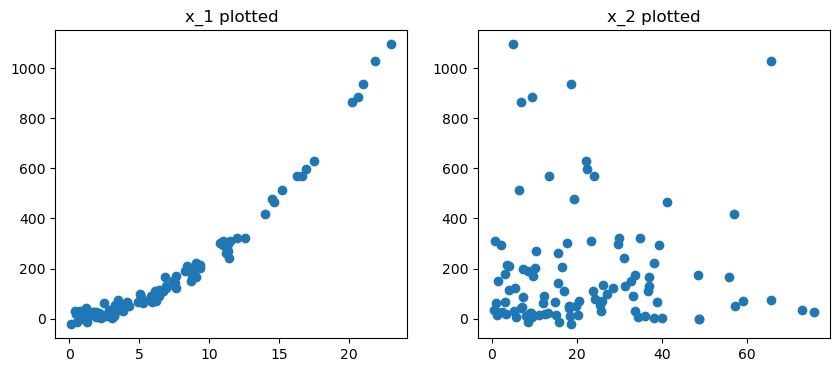

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axes[0].scatter(x_1, y)
axes[1].scatter(x_2, y)
axes[0].set_title("x_1 plotted")
axes[1].set_title("x_2 plotted")
plt.show()

In [9]:
df = pd.read_csv(r'D:\Work\1- MSA TA-RA\Machine Learning (Dr. Ammar)\Lab Notebooks\Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [11]:
X, y = df[["TV", "radio"]], df["sales"]
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [12]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)

LinearRegression()

In [14]:
poly_reg_y_predicted = poly_reg_model.predict(X_test)
poly_reg_y_predicted

array([17.12613275, 22.70545558, 20.50646375,  7.4883962 , 24.47215839,
       12.37083177, 22.84091908,  8.27394427, 12.08426543, 15.63355051,
        8.18891037,  8.0619188 , 12.15563924,  6.53945132, 10.50773863,
       12.31743673,  6.596114  , 16.61284651, 10.5641827 , 18.97156077,
       20.10091304, 12.03419692, 10.03855365, 22.10598936,  9.00621171,
        7.62120282, 22.42536499, 12.6925112 , 10.13473521,  6.6341236 ,
       11.67689895, 10.23600437, 23.36029729,  8.43445858, 15.51650407,
       20.990951  , 11.62487393, 20.32940196, 11.85642497,  6.41191478,
       10.72390758, 12.79329645,  9.18371778,  9.01443741, 11.83552303,
        7.05814363,  9.81046289, 14.78686395, 10.03157837, 11.50194282,
       14.19588743, 12.13120172,  8.01266769,  7.26702542,  8.4148368 ,
       10.84199053, 10.07358923, 25.34330073,  7.04682451, 11.86107075])

In [15]:
poly_reg_model.score(X_test,y_test)

0.9870636796865271

In [14]:
# from sklearn.metrics import mean_squared_error
# poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
# poly_reg_rmse

# Evaluating Model used k-fold cross validation

In [16]:
# load the dataset
df = pd.read_csv(r'D:\Work\1- MSA TA-RA\Machine Learning (Dr. Ammar)\Lab Notebooks\Advertising.csv')

# split the dataset into features and target
X = df.drop(['Unnamed: 0' , 'sales'], axis=1)
y = df['sales']

# create a linear regression model
model = LinearRegression()

# create a k-fold cross validation object
kf = KFold(n_splits=10, shuffle=True)

# loop over each fold and train the model
mse_scores = []
i = 0
for train_index, test_index in kf.split(X):
    # split the data into training and test sets
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # fit the model to the training data
    model.fit(x_train, y_train)

    # make predictions on the test data
    y_pred = model.predict(x_test)

    # calculate the mean squared error for this fold
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    print("Error of fold number", str(i) ,"=", str(model.score(x_test,y_test)))
    i += 1


Error of fold number 0 = 0.9018423646722289
Error of fold number 1 = 0.9186055035925078
Error of fold number 2 = 0.8882637713933446
Error of fold number 3 = 0.7745663933926858
Error of fold number 4 = 0.9325168374966013
Error of fold number 5 = 0.8785972726692362
Error of fold number 6 = 0.7976108857925603
Error of fold number 7 = 0.9357386474292585
Error of fold number 8 = 0.941741294921618
Error of fold number 9 = 0.8356360707800496


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.25, random_state=1)

# ---------------------------------------

In [2]:
df = pd.read_csv(r'C:\Users\tatas\Downloads\Compressed\archive_11\Players\Players\Fifa22.csv')
df

,Nombre,Rating,Posicion/es,Carta,Pais,PAC,SHO,PAS,DRI,DEF,PHY,Link
0,Mohamed Salah,99,CAM,pink,Egypt,99,99,96,99,54,88,https://wefut.com/player/22/23557/mohamed-salah
1,Ousmane Dembélé,99,RW,pink,France,99,96,94,99,49,79,https://wefut.com/player/22/22456/ousmane-dembele
2,Raphaël Varane,99,CB,pink,France,96,61,80,83,99,98,https://wefut.com/player/22/22450/raphael-varane
3,Cristiano Ronaldo,99,LW,shapeshifters,Portugal,99,99,90,97,50,92,https://wefut.com/player/22/22188/cristiano-ro...
4,Lionel Messi,99,CF,shapeshifters,Argentina,95,98,99,99,42,78,https://wefut.com/player/22/22165/lionel-messi
...,...,...,...,...,...,...,...,...,...,...,...,...
20678,Patrick Ferry,47,ST,bronze,Northern Ireland,49,48,38,43,18,37,https://wefut.com/player/22/17124/patrick-ferry
20679,Fang Xinfeng,47,CDM,bronze,China PR,54,31,43,44,43,52,https://wefut.com/player/22/17123/fang-xinfeng
20680,Wang Shilong,47,CB,bronze,China PR,61,23,27,33,52,46,https://wefut.com/player/22/17122/wang-shilong
20681,Darren Collins,47,ST,bronze,Republic of Ireland,68,48,43,51,31,35,https://wefut.com/player/22/17121/darren-collins
